# Steps of a machine learning workflow
## 1) Define the business goal/question of interest/research question
- Predict the amount of bike rentals at a specific time
- This might be helpful in order to schedule bike repairs

## 2) Get data

In [16]:
import pandas as pd
import seaborn as sns

In [40]:
df = pd.read_csv('train.csv', parse_dates=True)

In [23]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [24]:
# Define the variable of interest - in our case this is count
y = df['count']
X = df.drop(['casual', 'registered', 'count'], axis=1)

In [25]:
y.shape

(10886,)

In [26]:
X.shape

(10886, 9)

## 3) Train-test-split

The idea behind splitting the data into training and test set is that in the end we have part of the data (the test set) that the model has never seen. This will halp us to ultimately decide whether our model is able to generalise and whether it reaches a quality that we are happy with / helps us in achieving our goal

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=10)

In [29]:
Xtrain.shape, Xtest.shape

((8164, 9), (2722, 9))

The test set is now left untouched until we are done with building the model. Train test split should happen **even before exploratory data analysis** - to prevent any information from leaking into the model. **The test set should only be used once.** 

## 4) Exploratory data analysis
**Disclaimer:** this is not a full EDA, just an example

In [30]:
# check for null values:
Xtrain.isna().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
dtype: bool

In [31]:
# Plot variables against each other
dftrain = Xtrain.join(ytrain)

In [32]:
dftrain.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
9792,2012-10-12 09:00:00,4,0,1,1,20.50,24.240,39,19.9995,400
3815,2011-09-09 23:00:00,3,0,1,1,25.42,27.275,94,6.0032,148
2420,2011-06-08 18:00:00,2,0,1,1,36.90,40.910,37,15.0013,459
4176,2011-10-06 01:00:00,4,0,1,1,19.68,23.485,63,12.9980,22
4283,2011-10-10 12:00:00,4,1,0,2,28.70,32.575,48,6.0032,365


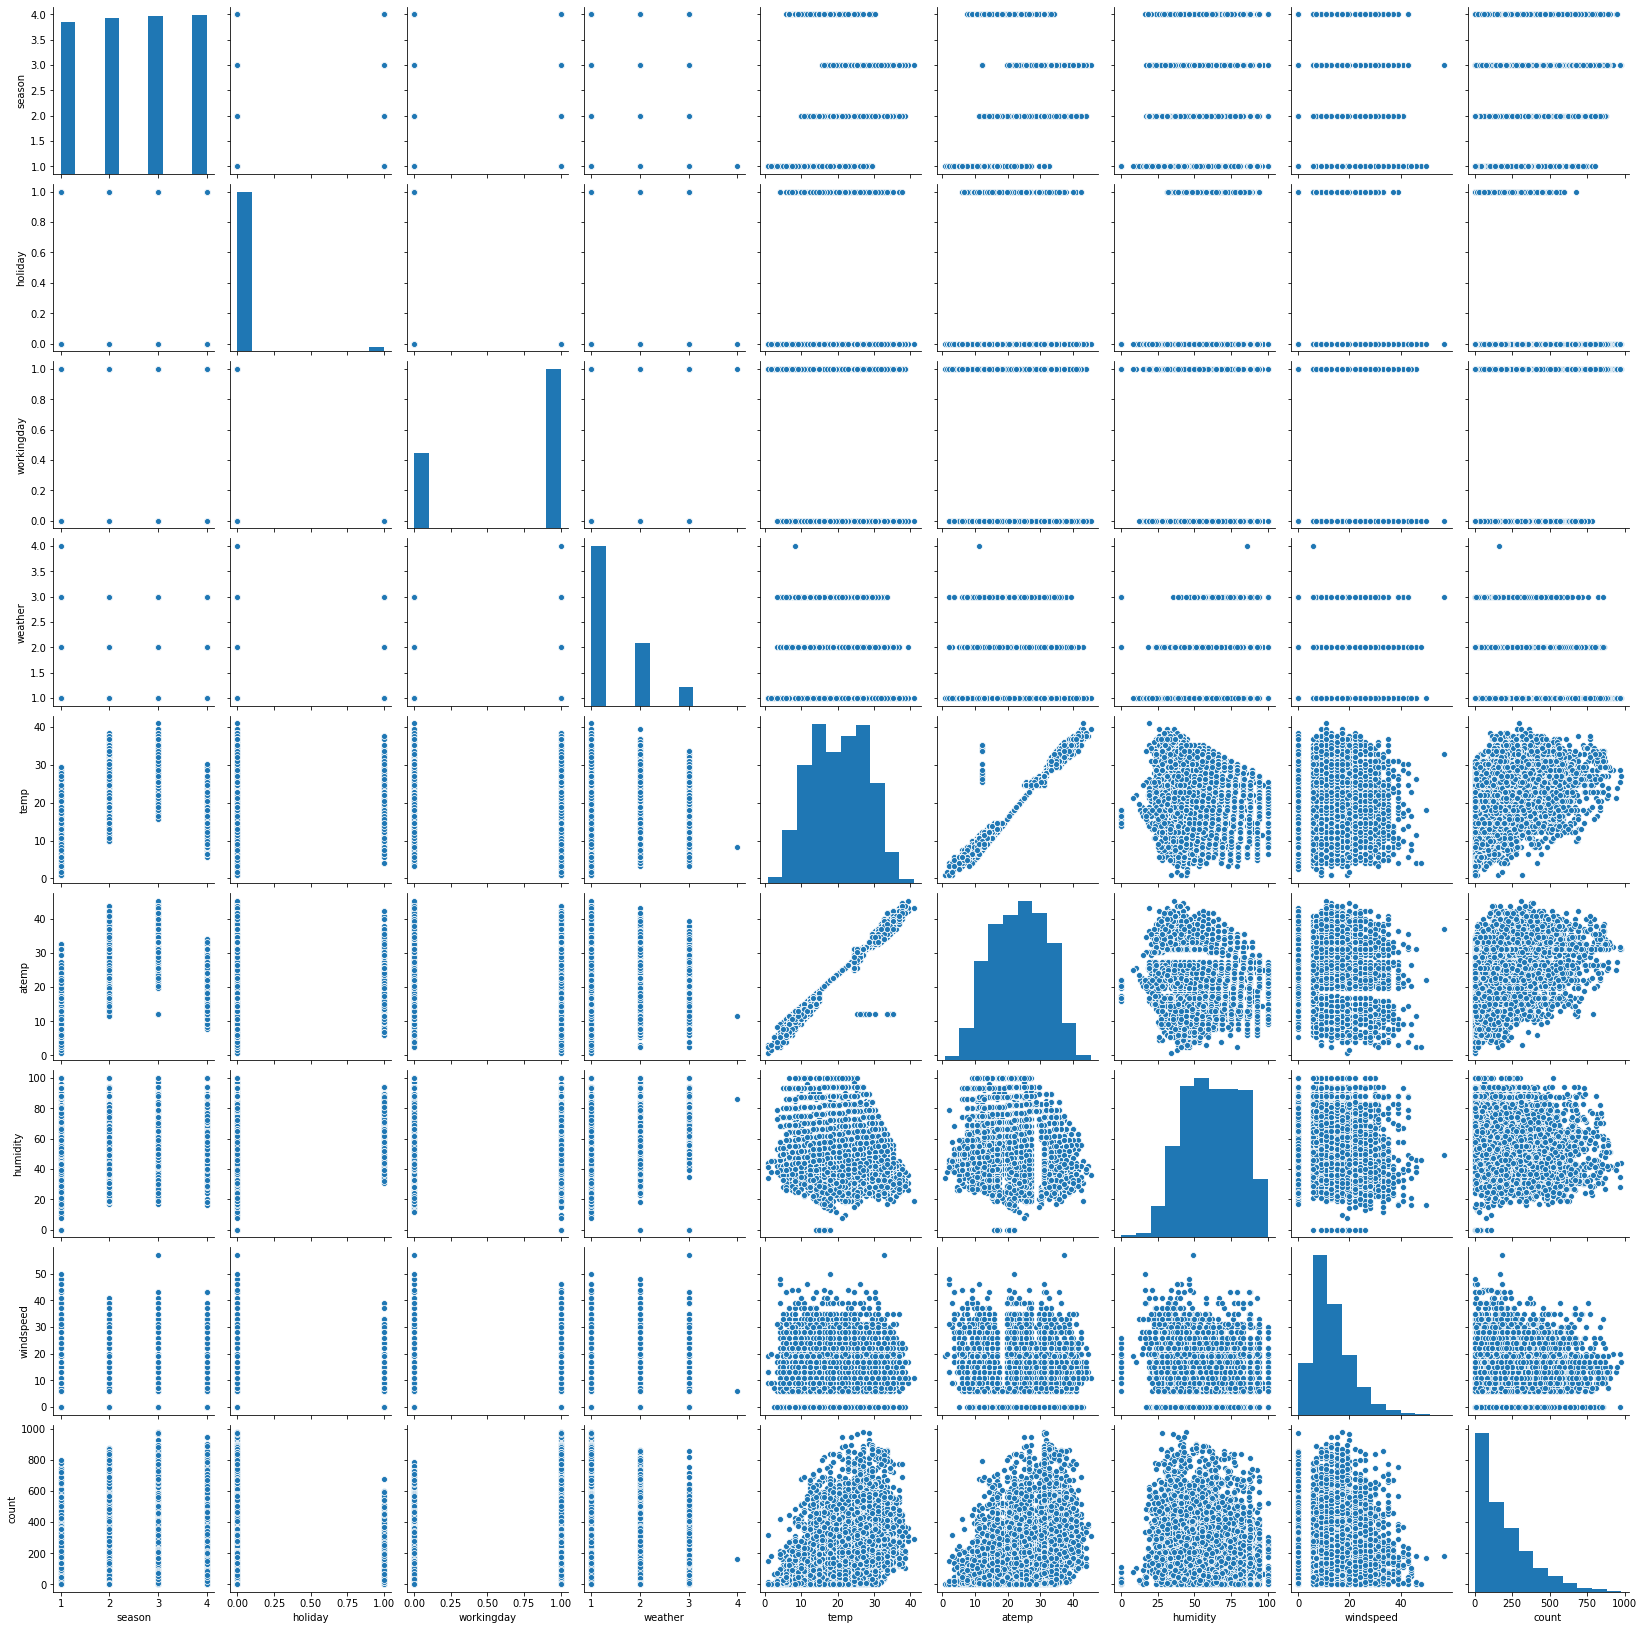

In [33]:
sns.pairplot(dftrain)

## 5. Feature engineering
- will be based on the EDA 
- here we decide whoch features to include (at least initially)
- we can transform features, combine them or pass them through (leave them unchanged)

**Disclaimer:** this is also not a complete feature engineering pipeline

In [52]:
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, FunctionTransformer
from sklearn.compose import ColumnTransformer

In [46]:
#Example: extract hour:
def create_hour(df):
    '''Creates an 'hour' column from datetime column
    
    Params:
    -------
    df:  the dataframe
    '''
    df = df.copy
    df['hour'] = pd.to_datetime(df['datetime']).dt.hour
    return df

In [47]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [48]:
df_test = create_hour(Xtrain)
df_test.head()


TypeError: 'method' object is not subscriptable

In [54]:
#dummy_features = ['hour']
interaction_features = ['weather', 'workingday']
passthrough_features = ['atemp', 'windspeed', 'holiday', ]
column_transformer = ColumnTransformer(transformers=[
                        #('dummy', OneHotEncoder(), dummy_features),
                        ('interaction_polynomial', PolynomialFeatures(degree=4), interaction_features)
])